In [ ]:
!pip install easyocr opencv-python matplotlib 

prev code

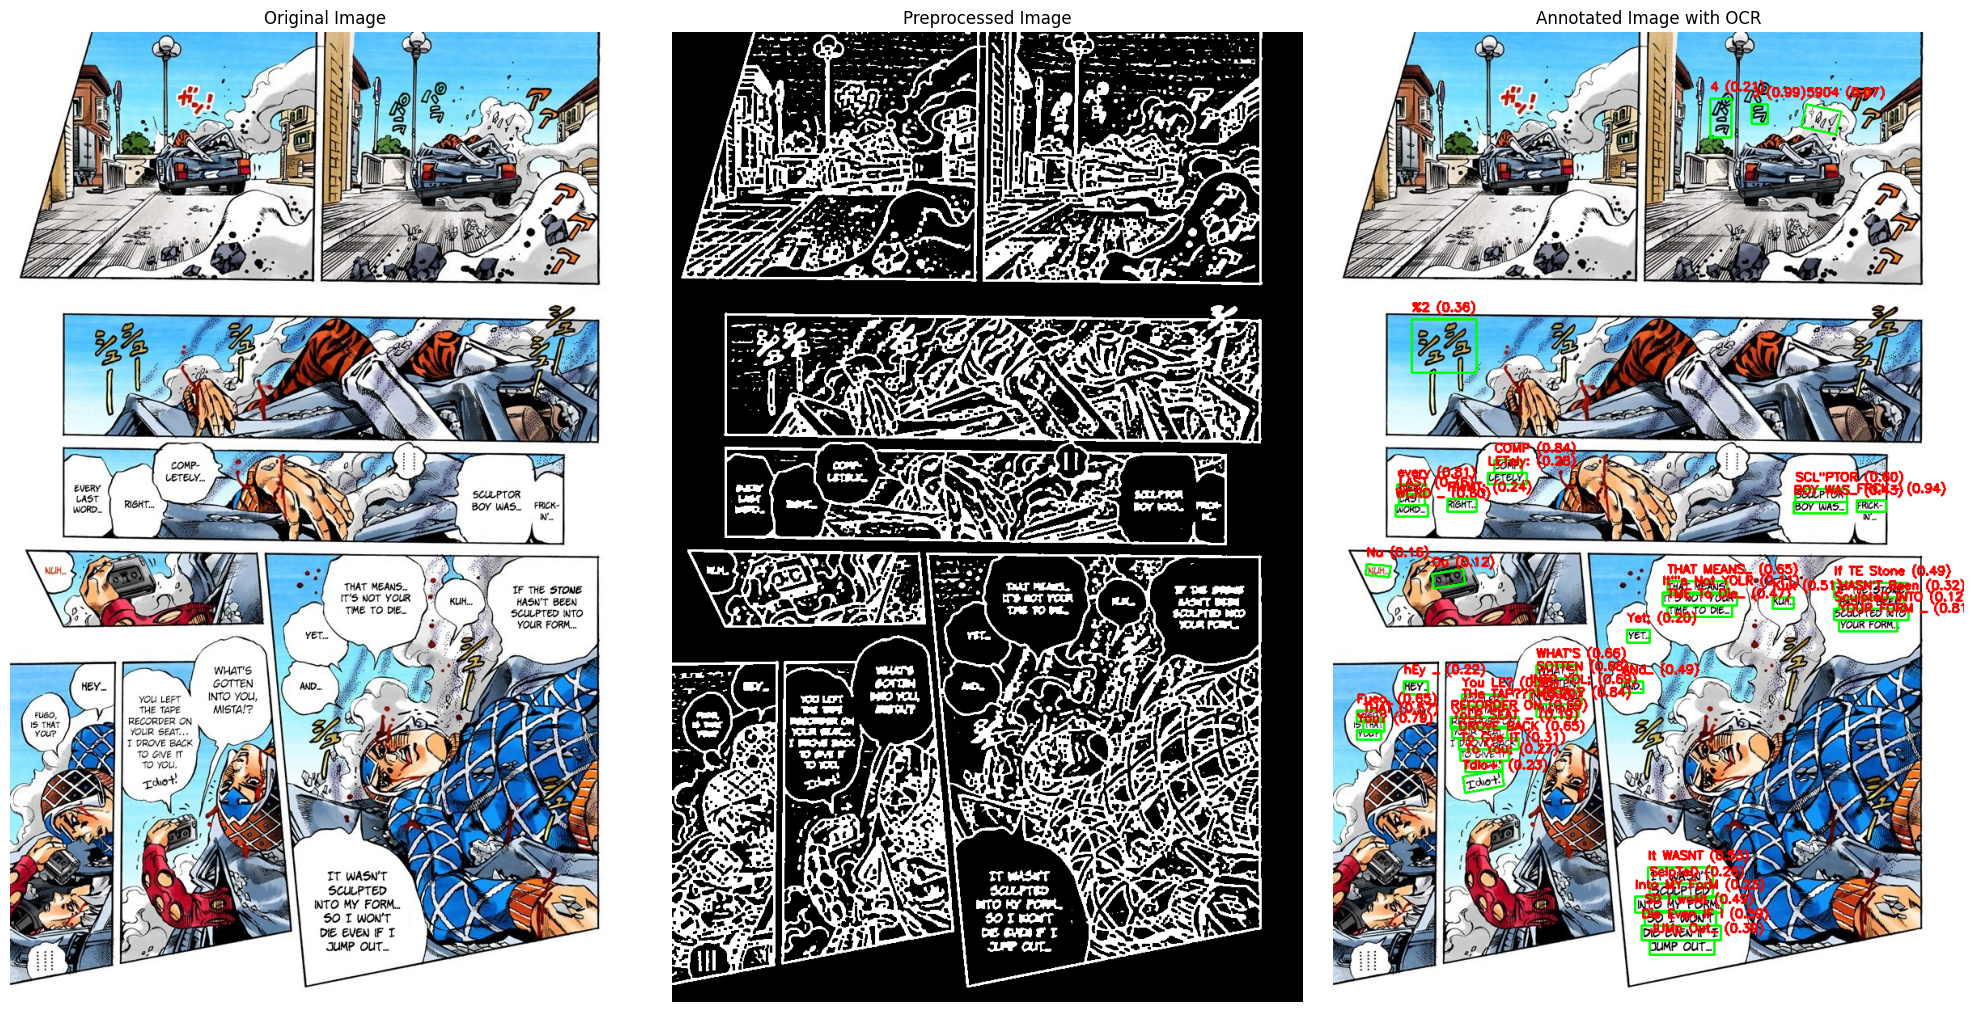

Text: 4
Text: 3
Text: %2
Text: COMP
Text: LETely:
Text: every
Text: LAST
Text: SCL"PTOR
Text: WCRD _
Text: RIeHT;
Text: BOY WAS_
Text: FRCK-
Text: THAT MEANS_
Text: If TE Stone
Text: It"'s Not YOLR
Text: Kuk
Text: HASN'T Been
Text: TME To Die_
Text: SculpteD INTO
Text: YOUR FORM _
Text: Yet;
Text: WHAT'S
Text: hEy _
Text: SOTTEN
Text: ANd_
Text: You LE?
Text: INTO YOL;
Text: THe TAP€
Text: MISTA ?
Text: Fueo,
Text: THAT
Text: RECORDER ON
Text: You?
Text: YoLR SEAT _
Text: DROVE BACK
Text: To Gve IT
Text: To You;
Text: It WASNT
Text: SclpTeD
Text: Into MY ForM
Text: S0 I woNt
Text: Die Even IF I
Text: JUMp Out_
Text: 5904
Text: Nu
Text: Oo
Text: Tdlo+'


In [10]:
import os
import cv2
import numpy as np
import easyocr
import matplotlib.pyplot as plt

class ComicPageOCR:
    def __init__(self, languages=['en']):
        """
        Initialize EasyOCR reader

        Args:
            languages (list): List of languages to support
        """
        self.reader = easyocr.Reader(languages)

    def preprocess_image(self, image_path):
        """
        Preprocess the image for better OCR performance

        Args:
            image_path (str): Path to the comic page image

        Returns:
            tuple: Preprocessed and original images
        """
        # Read the image
        original_image = cv2.imread(image_path)

        # Convert to grayscale
        gray = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

        # Apply Gaussian blur
        blurred = cv2.GaussianBlur(gray, (5, 5), 0)

        # Adaptive thresholding
        thresh = cv2.adaptiveThreshold(
            blurred,
            255,
            cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
            cv2.THRESH_BINARY_INV,
            11,
            2
        )

        # Morphological operations
        kernel = np.ones((3,3), np.uint8)
        preprocessed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

        return preprocessed, original_image

    def process_comic_page(self, image_path, output_path='ocr_output'):
        """
        Perform OCR on the comic page

        Args:
            image_path (str): Path to the comic page image
            output_path (str): Directory to save output files

        Returns:
            list: Detected text regions with their contents
        """
        # Create output directory
        os.makedirs(output_path, exist_ok=True)

        # Preprocess image
        preprocessed_image, original_image = self.preprocess_image(image_path)

        # Perform OCR
        results = self.reader.readtext(original_image)

        # Create annotated image
        annotated_image = original_image.copy()

        # Prepare text results storage
        extracted_texts = []

        # Process and annotate detected text regions
        for detection in results:
            # Unpack detection result
            bbox, text, confidence = detection

            # Convert bbox to integer coordinates
            bbox = np.array(bbox, dtype=np.int32)

            # Draw bounding box
            cv2.polylines(
                annotated_image,
                [bbox],
                isClosed=True,
                color=(0, 255, 0),
                thickness=2
            )

            # Add text label
            # Calculate text position (top-left of the bounding box)
            text_x, text_y = bbox[0]
            cv2.putText(
                annotated_image,
                f'{text} ({confidence:.2f})',
                (text_x, text_y - 10),
                cv2.FONT_HERSHEY_SIMPLEX,
                0.5,
                (0, 0, 255),
                2
            )

            # Store extracted text information
            extracted_texts.append({
                'text': text,
                'confidence': confidence,
                'bbox': bbox.tolist()
            })

        # Save preprocessed image
        cv2.imwrite(os.path.join(output_path, 'preprocessed_image.jpg'), preprocessed_image)

        # Save annotated image
        cv2.imwrite(os.path.join(output_path, 'annotated_image.jpg'), annotated_image)

        # Save extracted texts
        with open(os.path.join(output_path, 'ocr_results.txt'), 'w', encoding='utf-8') as f:
            for item in extracted_texts:
                f.write(f"Text: {item['text']}, Confidence: {item['confidence']:.2f}\n")

        # Visualization using Matplotlib
        plt.figure(figsize=(20,10))

        plt.subplot(131)
        plt.title('Original Image')
        plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
        plt.axis('off')

        plt.subplot(132)
        plt.title('Preprocessed Image')
        plt.imshow(preprocessed_image, cmap='gray')
        plt.axis('off')

        plt.subplot(133)
        plt.title('Annotated Image with OCR')
        plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
        plt.axis('off')

        plt.tight_layout()
        plt.savefig(os.path.join(output_path, 'results_comparison.jpg'))
        plt.show()

        return extracted_texts

def main():
    # Path to your comic page image
    image_path = '/b.jpeg'

    # Create OCR instance
    comic_ocr = ComicPageOCR()

    # Process the comic page
    results = comic_ocr.process_comic_page(image_path)

    # Print extracted texts
    for result in results:
        print(f"Text: {result['text']}")

if __name__ == "__main__":
    main()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [12]:
pip install pyspellchecker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 99.5 MB/s eta 0:00:00


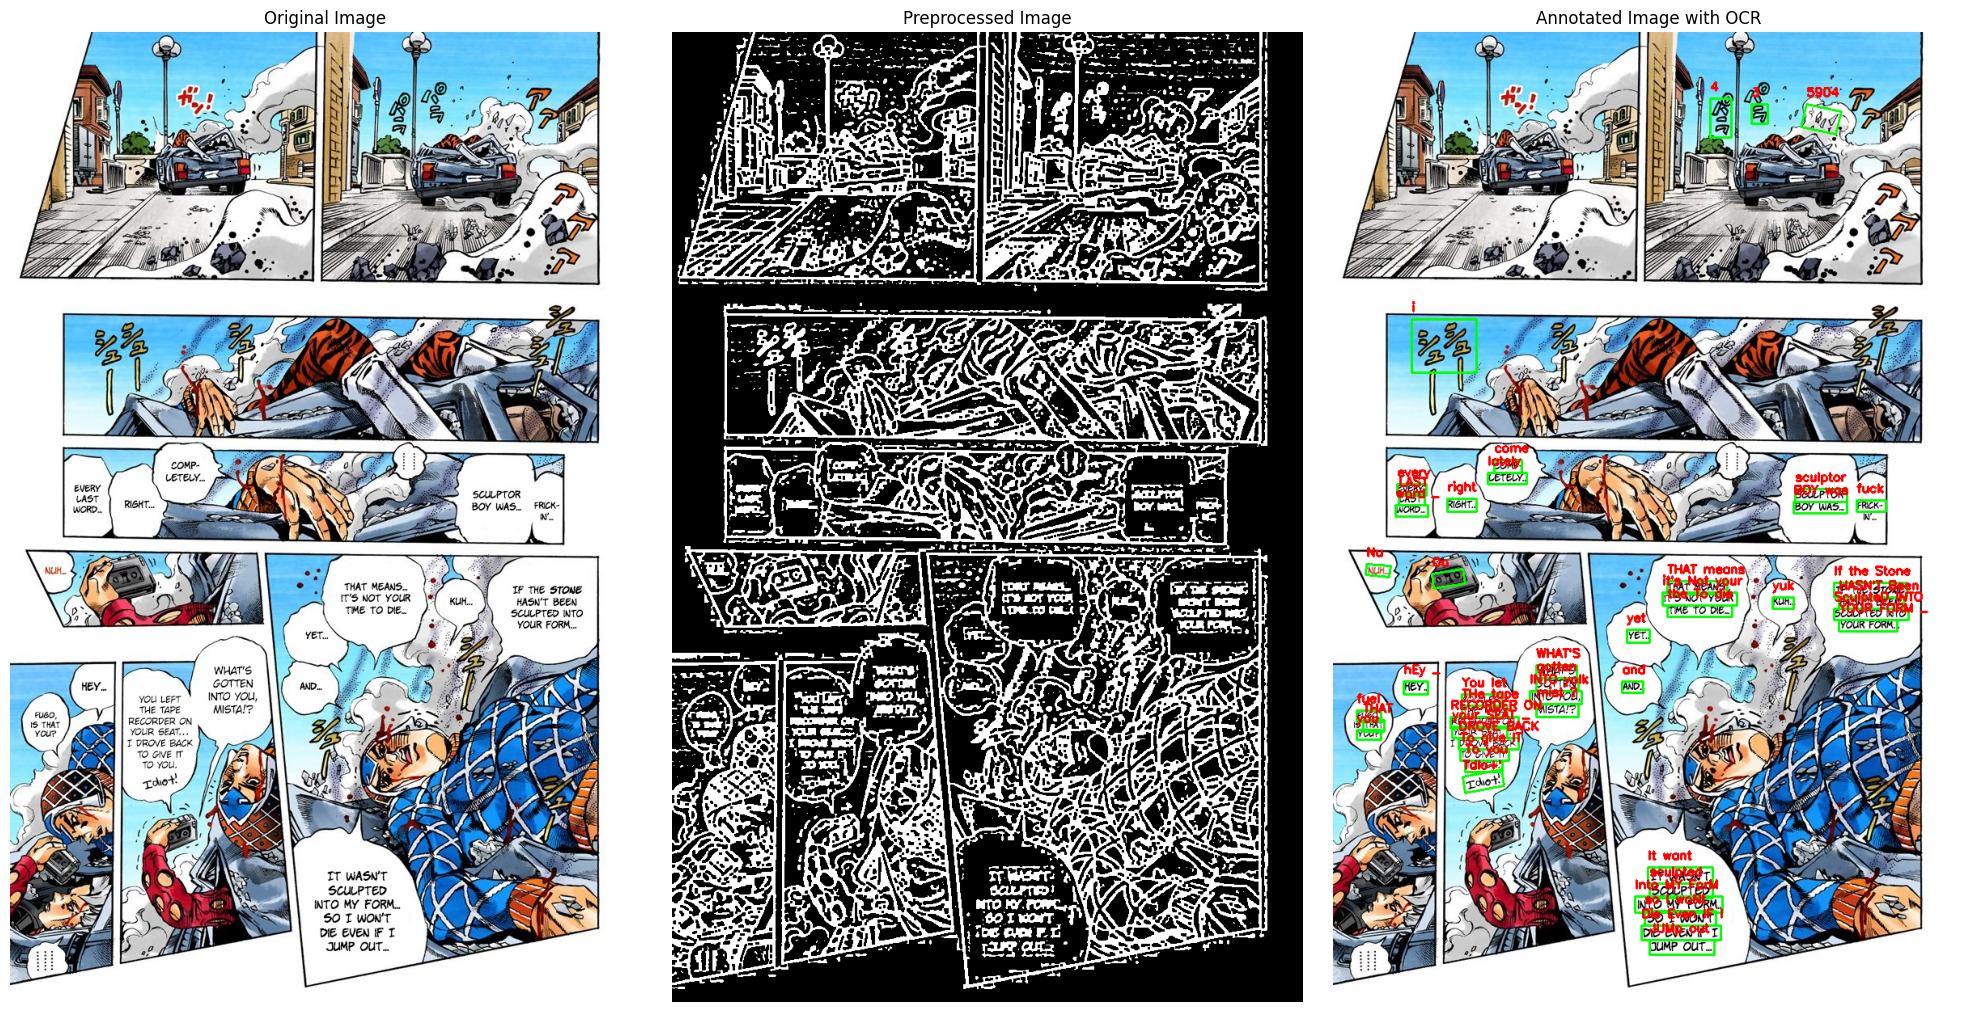

Grouped and Corrected Text:
1: 4
2: 3
3: i
4: come lately every LAST
5: sculptor word _
6: right BOY was fuck
7: THAT means If the Stone it's Not your yuk HASN'T Been the To die SculpteD INTO YOUR FORM _ yet
8: WHAT'S hEy _
9: gotten and You let INTO yolk THe tape mist ? fuel THAT RECORDER ON you your SEAT _ DROVE BACK To give IT To you
10: It want sculpted Into MY ForM so I woNt Die Even IF I JUMp out
11: 5904
12: Nu Oo
13: Tdlo+'


In [14]:
import os
import cv2
import numpy as np
import easyocr
import json
import matplotlib.pyplot as plt
from spellchecker import SpellChecker

class ComicPageOCR:
    def __init__(self, languages=['en']):
        """
        Initialize EasyOCR reader and spell checker
        """
        self.reader = easyocr.Reader(languages)
        self.spell = SpellChecker()

    def preprocess_image(self, image_path):
        """
        Preprocess the image for better OCR performance
        """
        # Read the image
        original_image = cv2.imread(image_path)

        # Convert to grayscale
        gray = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

        # Increase contrast using histogram equalization
        equalized = cv2.equalizeHist(gray)

        # Apply Gaussian blur for noise reduction
        blurred = cv2.GaussianBlur(equalized, (5, 5), 0)

        # Adaptive thresholding for binarization
        thresh = cv2.adaptiveThreshold(
            blurred, 255,
            cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
            cv2.THRESH_BINARY_INV, 11, 2
        )

        # Morphological operations to refine text regions
        kernel = np.ones((3, 3), np.uint8)
        processed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

        return processed, original_image

    def group_text_by_proximity(self, results, threshold=20):
        """
        Group text based on bounding box proximity
        """
        grouped_text = []
        current_group = []
        prev_bottom = None

        for bbox, text, confidence in results:
            top_left = bbox[0]
            bottom_right = bbox[2]
            top = top_left[1]

            if prev_bottom is None or abs(top - prev_bottom) < threshold:
                current_group.append(text)
            else:
                grouped_text.append(" ".join(current_group))
                current_group = [text]

            prev_bottom = bottom_right[1]

        if current_group:
            grouped_text.append(" ".join(current_group))

        return grouped_text

    def correct_text(self, text):
        """
        Correct spelling errors in detected text
        """
        words = text.split()
        corrected_words = [self.spell.correction(word) or word for word in words]
        return " ".join(corrected_words)

    def process_comic_page(self, image_path, output_path='ocr_output'):
        """
        Perform OCR on the comic page
        """
        os.makedirs(output_path, exist_ok=True)

        # Preprocess image
        preprocessed_image, original_image = self.preprocess_image(image_path)

        # Perform OCR
        results = self.reader.readtext(original_image, detail=1, paragraph=False)

        # Correct and group text
        corrected_results = []
        for bbox, text, confidence in results:
            corrected_text = self.correct_text(text)
            corrected_results.append((bbox, corrected_text, confidence))

        grouped_texts = self.group_text_by_proximity(corrected_results)

        # Annotate image
        annotated_image = original_image.copy()
        for bbox, text, confidence in corrected_results:
            bbox = np.array(bbox, dtype=np.int32)
            cv2.polylines(annotated_image, [bbox], isClosed=True, color=(0, 255, 0), thickness=2)
            text_x, text_y = bbox[0]
            cv2.putText(annotated_image, text, (text_x, text_y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)

        # Save images and results
        cv2.imwrite(os.path.join(output_path, 'preprocessed_image.jpg'), preprocessed_image)
        cv2.imwrite(os.path.join(output_path, 'annotated_image.jpg'), annotated_image)
        with open(os.path.join(output_path, 'ocr_results.json'), 'w', encoding='utf-8') as f:
            json.dump(grouped_texts, f, indent=4)

        # Visualization
        plt.figure(figsize=(20, 10))
        plt.subplot(131)
        plt.title('Original Image')
        plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
        plt.axis('off')

        plt.subplot(132)
        plt.title('Preprocessed Image')
        plt.imshow(preprocessed_image, cmap='gray')
        plt.axis('off')

        plt.subplot(133)
        plt.title('Annotated Image with OCR')
        plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
        plt.axis('off')

        plt.tight_layout()
        plt.savefig(os.path.join(output_path, 'results_comparison.jpg'))
        plt.show()

        return grouped_texts

def main():
    # Path to the comic page image
    image_path = '/b.jpeg'

    # Create OCR instance
    comic_ocr = ComicPageOCR()

    # Process the comic page
    results = comic_ocr.process_comic_page(image_path)

    # Print grouped and corrected text
    print("Grouped and Corrected Text:")
    for idx, text in enumerate(results, start=1):
        print(f"{idx}: {text}")

if __name__ == "__main__":
    main()


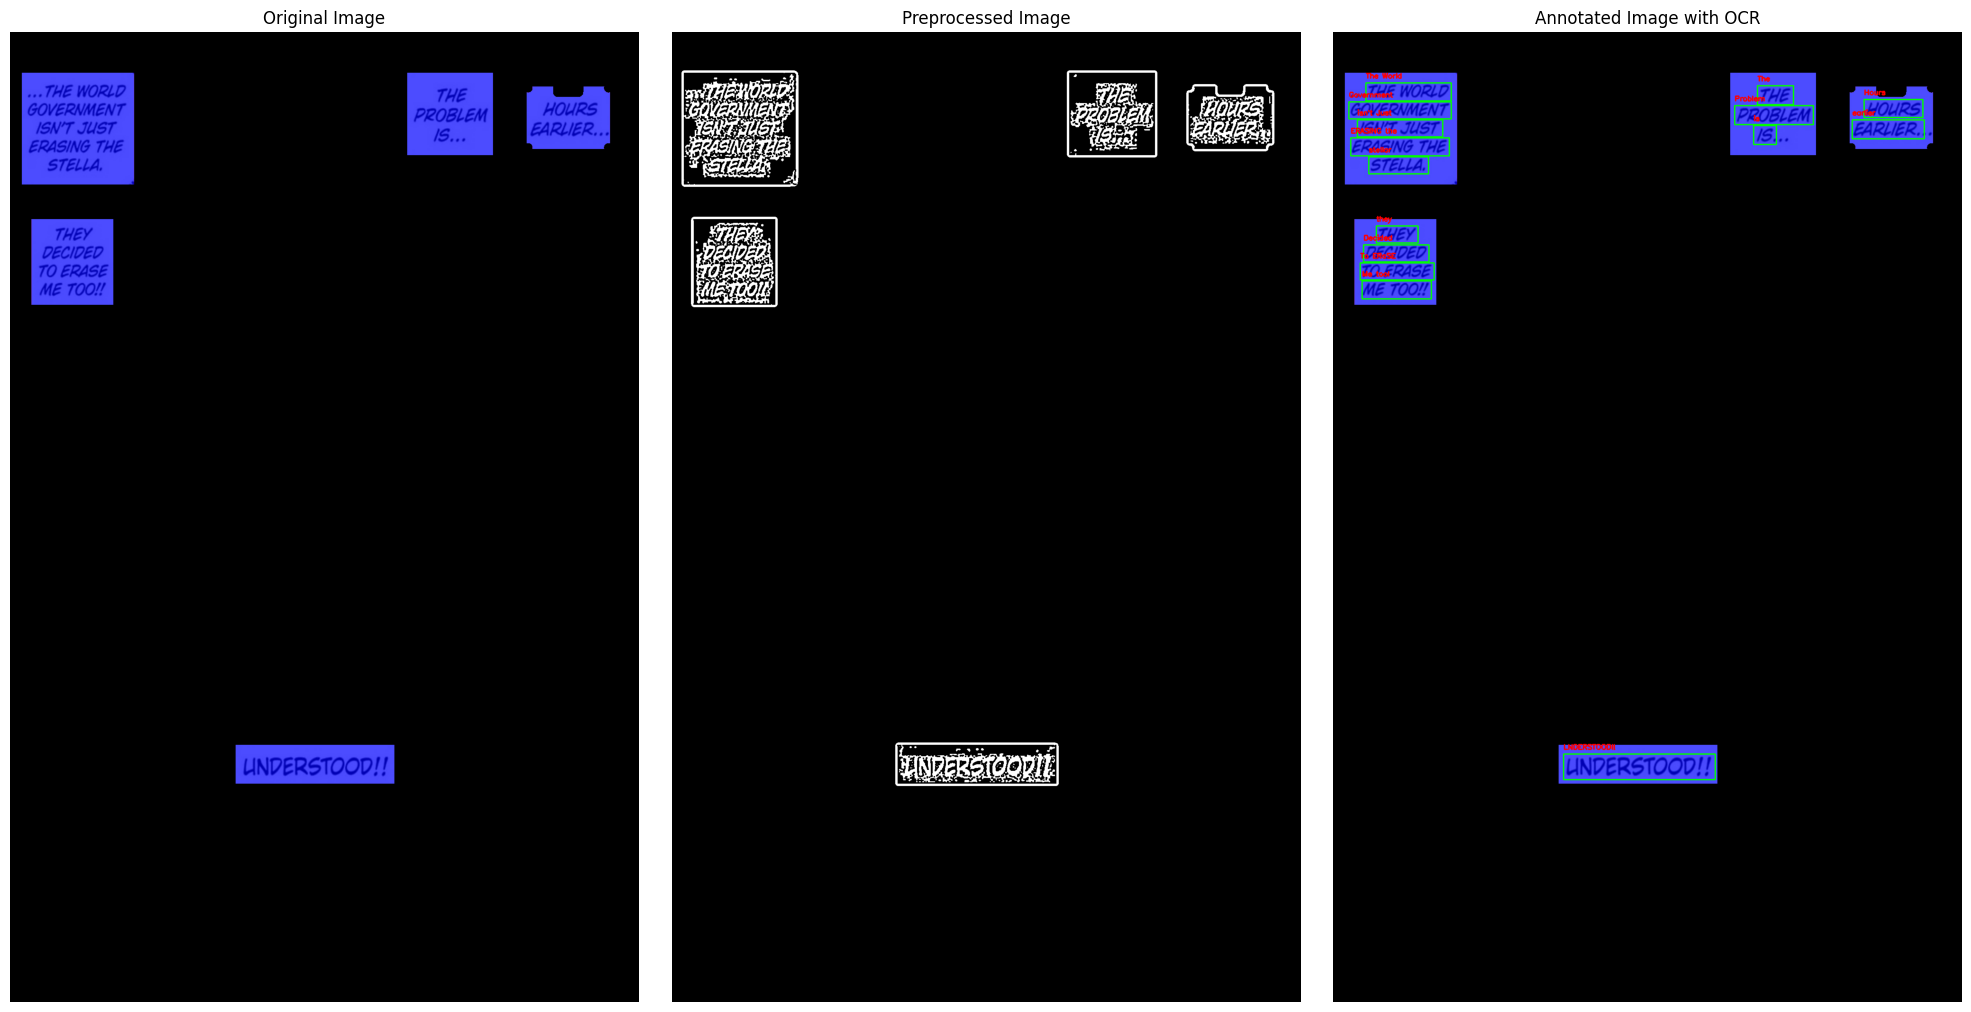

Grouped and Corrected Text:
1: The World
2: The
3: Government
4: Problem
5: Hours
6: isn't Just
7: is
8: earlier
9: ERASING the
10: stellar
11: they
12: Decided
13: To ERaSE
14: Me tool
15: LNDERSTOODI!


In [21]:
import os
import cv2
import numpy as np
import easyocr
import json
import matplotlib.pyplot as plt
from spellchecker import SpellChecker

class ComicPageOCR:
    def __init__(self, languages=['en']):
        """
        Initialize EasyOCR reader and spell checker
        """
        self.reader = easyocr.Reader(languages)
        self.spell = SpellChecker()

    def preprocess_image(self, image_path):
        """
        Preprocess the image for better OCR performance
        """
        # Read the image
        original_image = cv2.imread(image_path)

        # Convert to grayscale
        gray = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

        # Increase contrast
        equalized = cv2.equalizeHist(gray)

        # Apply Gaussian blur for noise reduction
        blurred = cv2.GaussianBlur(equalized, (5, 5), 0)

        # Adaptive thresholding
        thresh = cv2.adaptiveThreshold(
            blurred, 255,
            cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
            cv2.THRESH_BINARY_INV, 11, 2
        )

        # Morphological operations
        kernel = np.ones((3, 3), np.uint8)
        processed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

        return processed, original_image

    def group_text_by_bounding_boxes(self, results, overlap_threshold=0.5):
        """
        Group text based on overlapping bounding boxes
        """
        grouped_texts = []
        current_group = []
        prev_box = None

        for bbox, text, confidence in results:
            if prev_box is None:
                current_group.append(text)
                prev_box = bbox
            else:
                # Check if the current box overlaps significantly with the previous box
                overlap_area = self.compute_overlap(prev_box, bbox)
                if overlap_area > overlap_threshold:
                    current_group.append(text)
                else:
                    grouped_texts.append(" ".join(current_group))
                    current_group = [text]
                prev_box = bbox

        if current_group:
            grouped_texts.append(" ".join(current_group))

        return grouped_texts

    @staticmethod
    def compute_overlap(box1, box2):
        """
        Compute overlap between two bounding boxes
        """
        x1 = max(box1[0][0], box2[0][0])
        y1 = max(box1[0][1], box2[0][1])
        x2 = min(box1[2][0], box2[2][0])
        y2 = min(box1[2][1], box2[2][1])

        intersection = max(0, x2 - x1) * max(0, y2 - y1)
        area_box1 = (box1[2][0] - box1[0][0]) * (box1[2][1] - box1[0][1])
        area_box2 = (box2[2][0] - box2[0][0]) * (box2[2][1] - box2[0][1])

        union = area_box1 + area_box2 - intersection

        return intersection / union

    def correct_text(self, text):
        """
        Correct spelling errors in detected text
        """
        words = text.split()
        corrected_words = [self.spell.correction(word) or word for word in words]
        return " ".join(corrected_words)

    def process_comic_page(self, image_path, output_path='ocr_output'):
        """
        Perform OCR on the comic page
        """
        os.makedirs(output_path, exist_ok=True)

        # Preprocess image
        preprocessed_image, original_image = self.preprocess_image(image_path)

        # Perform OCR
        results = self.reader.readtext(original_image, detail=1, paragraph=False)

        # Correct and group text
        corrected_results = []
        for bbox, text, confidence in results:
            corrected_text = self.correct_text(text)
            corrected_results.append((bbox, corrected_text, confidence))

        grouped_texts = self.group_text_by_bounding_boxes(corrected_results)

        # Annotate image
        annotated_image = original_image.copy()
        for bbox, text, confidence in corrected_results:
            bbox = np.array(bbox, dtype=np.int32)
            cv2.polylines(annotated_image, [bbox], isClosed=True, color=(0, 255, 0), thickness=2)
            text_x, text_y = bbox[0]
            cv2.putText(annotated_image, text, (text_x, text_y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)

        # Save images and results
        cv2.imwrite(os.path.join(output_path, 'preprocessed_image.jpg'), preprocessed_image)
        cv2.imwrite(os.path.join(output_path, 'annotated_image.jpg'), annotated_image)
        with open(os.path.join(output_path, 'ocr_results.json'), 'w', encoding='utf-8') as f:
            json.dump(grouped_texts, f, indent=4)

        # Visualization
        plt.figure(figsize=(20, 10))
        plt.subplot(131)
        plt.title('Original Image')
        plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
        plt.axis('off')

        plt.subplot(132)
        plt.title('Preprocessed Image')
        plt.imshow(preprocessed_image, cmap='gray')
        plt.axis('off')

        plt.subplot(133)
        plt.title('Annotated Image with OCR')
        plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
        plt.axis('off')

        plt.tight_layout()
        plt.savefig(os.path.join(output_path, 'results_comparison.jpg'))
        plt.show()

        return grouped_texts

def main():
    # Path to the comic page image
    image_path = '/blue_highlighted_only.png'

    # Create OCR instance
    comic_ocr = ComicPageOCR()

    # Process the comic page
    results = comic_ocr.process_comic_page(image_path)

    # Print grouped and corrected text
    print("Grouped and Corrected Text:")
    for idx, text in enumerate(results, start=1):
        print(f"{idx}: {text}")

if __name__ == "__main__":
    main()


#blue

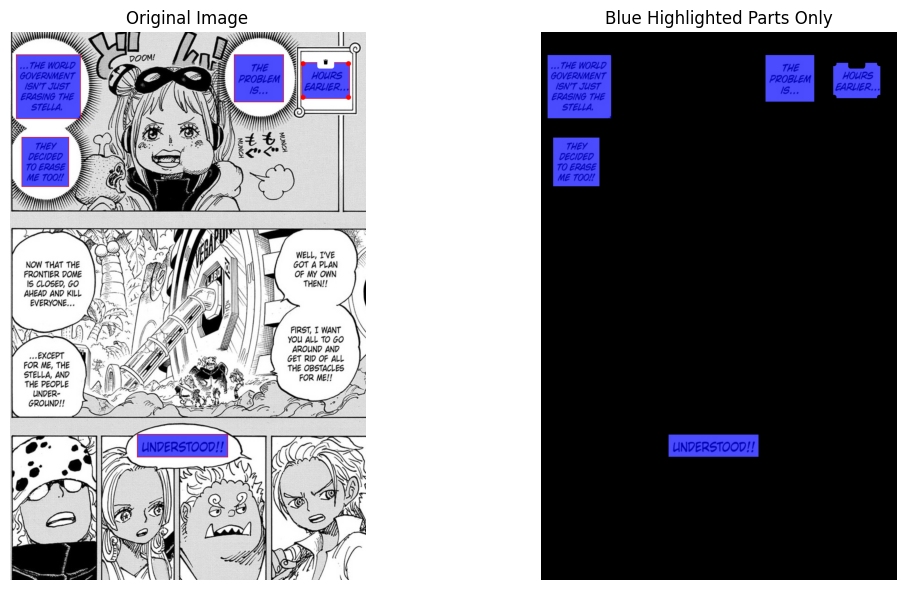

'/mnt/data/blue_highlighted_only.png'

In [18]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the uploaded image
image_path = '/image.png'
image = cv2.imread(image_path)

# Convert to grayscale for processing
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Define a mask for blue regions (based on the HSV color space)
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
lower_blue = np.array([100, 150, 50])
upper_blue = np.array([140, 255, 255])
blue_mask = cv2.inRange(hsv, lower_blue, upper_blue)

# Apply the mask to retain only the blue-highlighted regions
blue_highlighted = cv2.bitwise_and(image, image, mask=blue_mask)

# Create an inverted mask for the rest of the image
inverted_mask = cv2.bitwise_not(blue_mask)

# Clear out everything except blue-highlighted parts
result = cv2.bitwise_and(blue_highlighted, blue_highlighted, mask=blue_mask)

# Display the original and processed images side by side
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Blue Highlighted Parts Only')
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.tight_layout()
plt.show()

# Save the result
output_path = '/mnt/data/blue_highlighted_only.png'
cv2.imwrite(output_path, result)
output_path


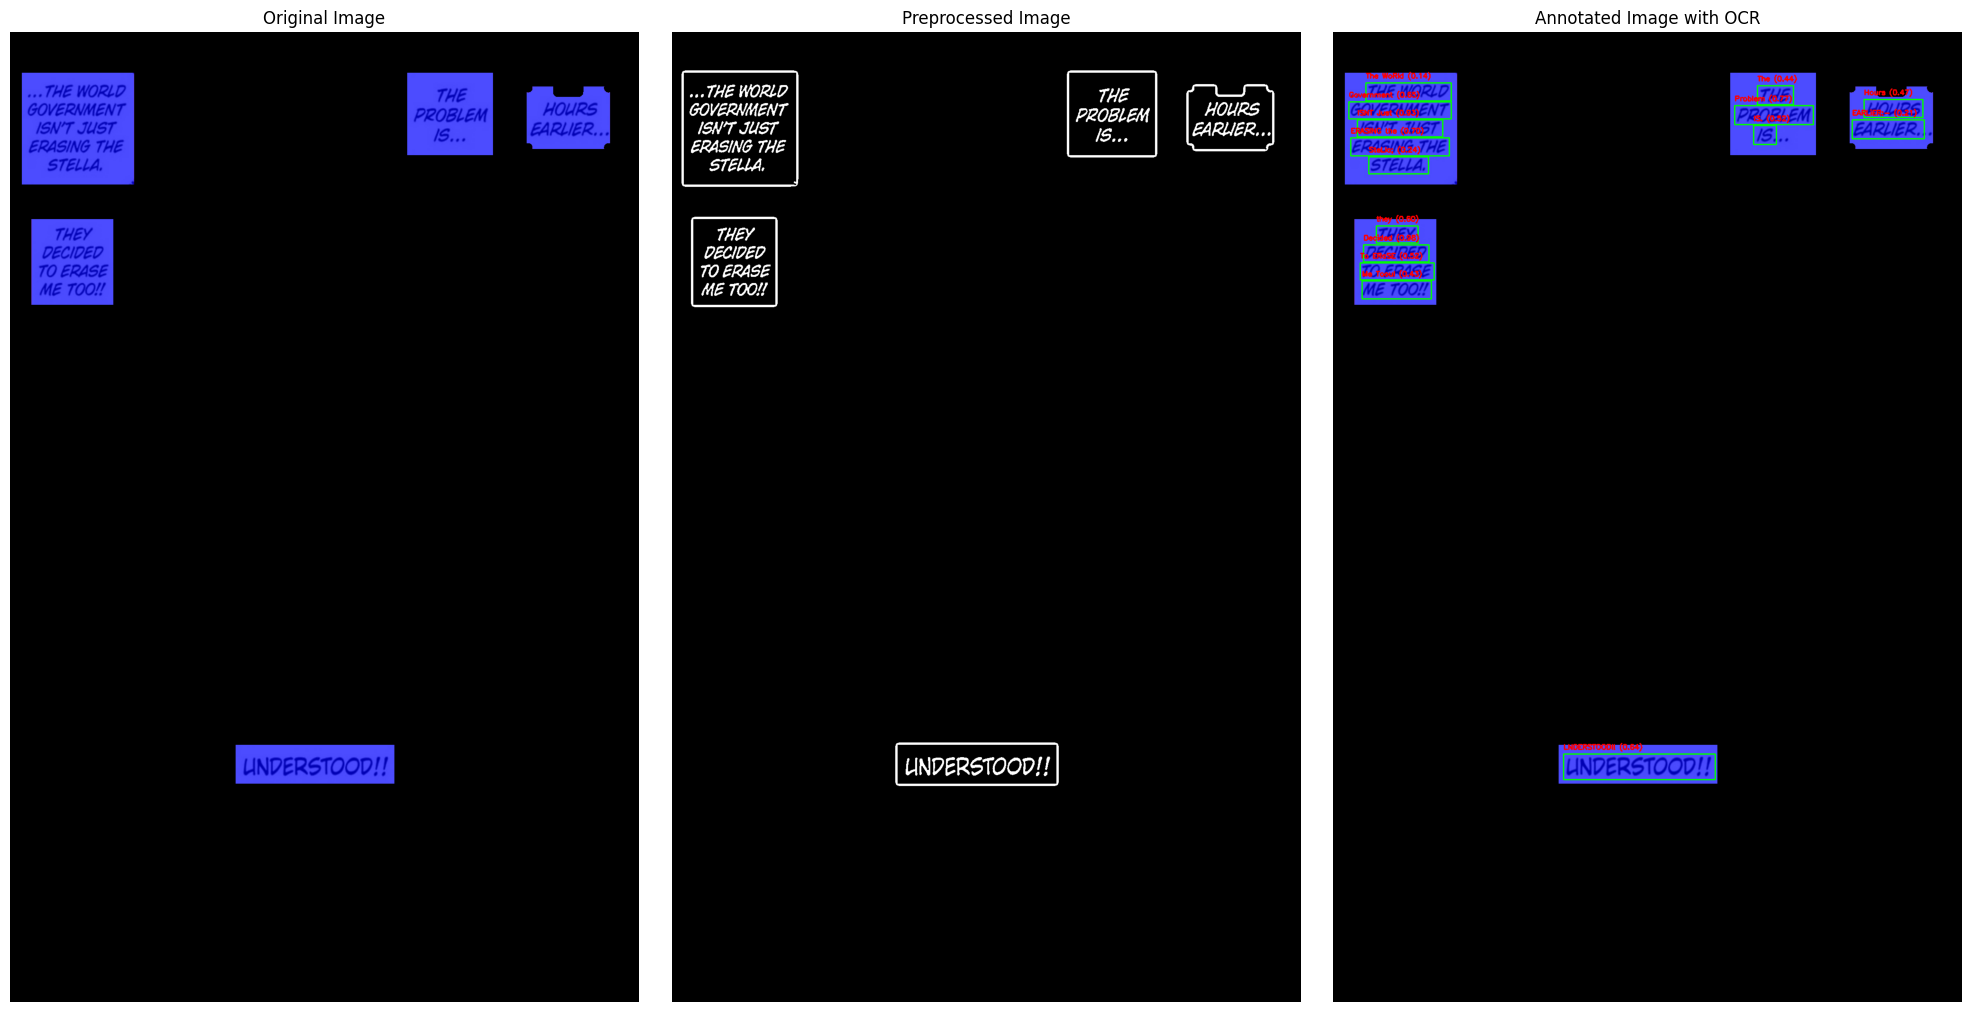

[{'text': 'The WoRld',
  'confidence': 0.13943131365364095,
  'bbox': [[69, 107], [249, 107], [249, 145], [69, 145]]},
 {'text': 'The',
  'confidence': 0.43993896746832256,
  'bbox': [[895, 113], [971, 113], [971, 153], [895, 153]]},
 {'text': 'Government',
  'confidence': 0.6523551880617433,
  'bbox': [[33, 147], [249, 147], [249, 183], [33, 183]]},
 {'text': 'Problem',
  'confidence': 0.7680171221399392,
  'bbox': [[847, 155], [1013, 155], [1013, 195], [847, 195]]},
 {'text': 'Hours',
  'confidence': 0.46893473869968216,
  'bbox': [[1120, 142], [1244, 142], [1244, 180], [1120, 180]]},
 {'text': 'ISNT Just',
  'confidence': 0.9252925413535266,
  'bbox': [[51, 185], [231, 185], [231, 221], [51, 221]]},
 {'text': 'IS.',
  'confidence': 0.5175015627504935,
  'bbox': [[887, 197], [935, 197], [935, 237], [887, 237]]},
 {'text': 'EARLiER:-',
  'confidence': 0.21374214968252966,
  'bbox': [[1095, 185], [1247, 185], [1247, 225], [1095, 225]]},
 {'text': 'ERASING the',
  'confidence': 0.703576

In [20]:
# Redefining and initializing the ComicPageOCR class from the provided earlier code
import os
import cv2
import numpy as np
import easyocr
import matplotlib.pyplot as plt

class ComicPageOCR:
    def __init__(self, languages=['en']):
        """
        Initialize EasyOCR reader

        Args:
            languages (list): List of languages to support
        """
        self.reader = easyocr.Reader(languages, gpu=False)

    def preprocess_image(self, image_path):
        """
        Preprocess the image for better OCR performance

        Args:
            image_path (str): Path to the comic page image

        Returns:
            tuple: Preprocessed and original images
        """
        # Read the image
        original_image = cv2.imread(image_path)

        # Convert to grayscale
        gray = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

        # Apply Gaussian blur
        blurred = cv2.GaussianBlur(gray, (5, 5), 0)

        # Adaptive thresholding
        thresh = cv2.adaptiveThreshold(
            blurred,
            255,
            cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
            cv2.THRESH_BINARY_INV,
            11,
            2
        )

        # Morphological operations
        kernel = np.ones((3,3), np.uint8)
        preprocessed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

        return preprocessed, original_image

    def process_comic_page(self, image_path, output_path='ocr_output'):
        """
        Perform OCR on the comic page

        Args:
            image_path (str): Path to the comic page image
            output_path (str): Directory to save output files

        Returns:
            list: Detected text regions with their contents
        """
        # Create output directory
        os.makedirs(output_path, exist_ok=True)

        # Preprocess image
        preprocessed_image, original_image = self.preprocess_image(image_path)

        # Perform OCR
        results = self.reader.readtext(original_image)

        # Create annotated image
        annotated_image = original_image.copy()

        # Prepare text results storage
        extracted_texts = []

        # Process and annotate detected text regions
        for detection in results:
            # Unpack detection result
            bbox, text, confidence = detection

            # Convert bbox to integer coordinates
            bbox = np.array(bbox, dtype=np.int32)

            # Draw bounding box
            cv2.polylines(
                annotated_image,
                [bbox],
                isClosed=True,
                color=(0, 255, 0),
                thickness=2
            )

            # Add text label
            # Calculate text position (top-left of the bounding box)
            text_x, text_y = bbox[0]
            cv2.putText(
                annotated_image,
                f'{text} ({confidence:.2f})',
                (text_x, text_y - 10),
                cv2.FONT_HERSHEY_SIMPLEX,
                0.5,
                (0, 0, 255),
                2
            )

            # Store extracted text information
            extracted_texts.append({
                'text': text,
                'confidence': confidence,
                'bbox': bbox.tolist()
            })

        # Save preprocessed image
        cv2.imwrite(os.path.join(output_path, 'preprocessed_image.jpg'), preprocessed_image)

        # Save annotated image
        cv2.imwrite(os.path.join(output_path, 'annotated_image.jpg'), annotated_image)

        # Save extracted texts
        with open(os.path.join(output_path, 'ocr_results.txt'), 'w', encoding='utf-8') as f:
            for item in extracted_texts:
                f.write(f"Text: {item['text']}, Confidence: {item['confidence']:.2f}\n")

        # Visualization using Matplotlib
        plt.figure(figsize=(20,10))

        plt.subplot(131)
        plt.title('Original Image')
        plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
        plt.axis('off')

        plt.subplot(132)
        plt.title('Preprocessed Image')
        plt.imshow(preprocessed_image, cmap='gray')
        plt.axis('off')

        plt.subplot(133)
        plt.title('Annotated Image with OCR')
        plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
        plt.axis('off')

        plt.tight_layout()
        plt.savefig(os.path.join(output_path, 'results_comparison.jpg'))
        plt.show()

        return extracted_texts

# Initialize the OCR system
comic_ocr = ComicPageOCR()

# Apply OCR on the processed blue-highlighted image
highlighted_image_path = '/blue_highlighted_only.png'
ocr_results_highlighted = comic_ocr.process_comic_page(highlighted_image_path, output_path='highlighted_text_ocr')

ocr_results_highlighted


In [2]:
import os
import cv2
import numpy as np
import easyocr
import json
import matplotlib.pyplot as plt
from spellchecker import SpellChecker

class ComicPageOCR:
    def __init__(self, languages=['en']):
        """
        Initialize EasyOCR reader and spell checker
        """
        self.reader = easyocr.Reader(languages)
        self.spell = SpellChecker()

    def preprocess_image(self, image_path):
        """
        Preprocess the image for better OCR performance
        """
        # Read the image
        original_image = cv2.imread(image_path)

        # Convert to grayscale
        gray = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

        # Increase contrast
        equalized = cv2.equalizeHist(gray)

        # Apply Gaussian blur for noise reduction
        blurred = cv2.GaussianBlur(equalized, (5, 5), 0)

        # Adaptive thresholding
        thresh = cv2.adaptiveThreshold(
            blurred, 255,
            cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
            cv2.THRESH_BINARY_INV, 11, 2
        )

        # Morphological operations
        kernel = np.ones((3, 3), np.uint8)
        processed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

        return processed, original_image

    def group_text_by_bounding_boxes(self, results, overlap_threshold=0.5):
        """
        Group text based on overlapping bounding boxes and sort from right to left
        """
        # Sort results by the rightmost x-coordinate of bounding boxes
        results = sorted(results, key=lambda r: r[0][2][0], reverse=True)

        grouped_texts = []
        current_group = []
        prev_box = None

        for bbox, text, confidence in results:
            if prev_box is None:
                current_group.append(text)
                prev_box = bbox
            else:
                # Check if the current box overlaps significantly with the previous box
                overlap_area = self.compute_overlap(prev_box, bbox)
                if overlap_area > overlap_threshold:
                    current_group.append(text)
                else:
                    grouped_texts.append(" ".join(current_group[::-1]))  # Reverse the text for RTL
                    current_group = [text]
                prev_box = bbox

        if current_group:
            grouped_texts.append(" ".join(current_group[::-1]))  # Reverse the text for RTL

        return grouped_texts

    @staticmethod
    def compute_overlap(box1, box2):
        """
        Compute overlap between two bounding boxes
        """
        x1 = max(box1[0][0], box2[0][0])
        y1 = max(box1[0][1], box2[0][1])
        x2 = min(box1[2][0], box2[2][0])
        y2 = min(box1[2][1], box2[2][1])

        intersection = max(0, x2 - x1) * max(0, y2 - y1)
        area_box1 = (box1[2][0] - box1[0][0]) * (box1[2][1] - box1[0][1])
        area_box2 = (box2[2][0] - box2[0][0]) * (box2[2][1] - box2[0][1])

        union = area_box1 + area_box2 - intersection

        return intersection / union

    def correct_text(self, text):
        """
        Correct spelling errors in detected text
        """
        words = text.split()
        corrected_words = [self.spell.correction(word) or word for word in words]
        return " ".join(corrected_words)

    def process_comic_page(self, image_path, output_path='ocr_output'):
        """
        Perform OCR on the comic page
        """
        os.makedirs(output_path, exist_ok=True)

        # Preprocess image
        preprocessed_image, original_image = self.preprocess_image(image_path)

        # Perform OCR
        results = self.reader.readtext(original_image, detail=1, paragraph=False)

        # Correct and group text
        corrected_results = []
        for bbox, text, confidence in results:
            corrected_text = self.correct_text(text)
            corrected_results.append((bbox, corrected_text, confidence))

        grouped_texts = self.group_text_by_bounding_boxes(corrected_results)

        # Annotate image
        annotated_image = original_image.copy()
        for bbox, text, confidence in corrected_results:
            bbox = np.array(bbox, dtype=np.int32)
            cv2.polylines(annotated_image, [bbox], isClosed=True, color=(0, 255, 0), thickness=2)
            text_x, text_y = bbox[0]
            cv2.putText(annotated_image, text, (text_x, text_y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)

        # Save images and results
        cv2.imwrite(os.path.join(output_path, 'preprocessed_image.jpg'), preprocessed_image)
        cv2.imwrite(os.path.join(output_path, 'annotated_image.jpg'), annotated_image)
        with open(os.path.join(output_path, 'ocr_results.json'), 'w', encoding='utf-8') as f:
            json.dump(grouped_texts, f, indent=4)

        # Visualization
        plt.figure(figsize=(20, 10))
        plt.subplot(131)
        plt.title('Original Image')
        plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
        plt.axis('off')

        plt.subplot(132)
        plt.title('Preprocessed Image')
        plt.imshow(preprocessed_image, cmap='gray')
        plt.axis('off')

        plt.subplot(133)
        plt.title('Annotated Image with OCR')
        plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
        plt.axis('off')

        plt.tight_layout()
        plt.savefig(os.path.join(output_path, 'results_comparison.jpg'))
        plt.show()

        return grouped_texts

def main():
    # Path to the comic page image
    image_path = './a.png'

    # Create OCR instance
    comic_ocr = ComicPageOCR()

    # Process the comic page
    results = comic_ocr.process_comic_page(image_path)

    # Print grouped and corrected text
    print("Grouped and Corrected Text:")
    for idx, text in enumerate(results, start=1):
        print(f"{idx}: {text}")

if __name__ == "__main__":
    main()


ModuleNotFoundError: No module named 'easyocr'

In [25]:
import os
import cv2
import numpy as np
import easyocr
import json
import matplotlib.pyplot as plt
from spellchecker import SpellChecker

class ComicPageOCR:
    def __init__(self, languages=['en']):
        """
        Initialize EasyOCR reader and spell checker
        """
        self.reader = easyocr.Reader(languages)
        self.spell = SpellChecker()

    def preprocess_image(self, image_path):
        """
        Preprocess the image for better OCR performance
        """
        # Read the image
        original_image = cv2.imread(image_path)

        # Convert to grayscale
        gray = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

        # Increase contrast
        equalized = cv2.equalizeHist(gray)

        # Apply Gaussian blur for noise reduction
        blurred = cv2.GaussianBlur(equalized, (5, 5), 0)

        # Adaptive thresholding
        thresh = cv2.adaptiveThreshold(
            blurred, 255,
            cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
            cv2.THRESH_BINARY_INV, 11, 2
        )

        # Morphological operations
        kernel = np.ones((3, 3), np.uint8)
        processed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

        return processed, original_image

    def detect_highlighted_areas(self, image):
        """
        Detect highlighted areas in the image
        """
        # Convert to HSV for color detection
        hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

        # Define color range for highlights (adjust values for your highlights)
        lower_color = np.array([20, 100, 100])  # Example for yellow highlights
        upper_color = np.array([30, 255, 255])

        # Create a mask for highlighted areas
        mask = cv2.inRange(hsv_image, lower_color, upper_color)

        # Find contours of highlighted areas
        contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        return contours

    def extract_text_outside_highlights(self, image, contours):
        """
        Extract text from areas outside highlights
        """
        mask = np.zeros(image.shape[:2], dtype=np.uint8)

        # Draw filled contours on the mask
        cv2.drawContours(mask, contours, -1, 255, thickness=cv2.FILLED)

        # Invert the mask to keep non-highlighted areas
        inverted_mask = cv2.bitwise_not(mask)

        # Mask the original image to extract non-highlighted areas
        non_highlighted_image = cv2.bitwise_and(image, image, mask=inverted_mask)

        # Perform OCR on non-highlighted areas
        results = self.reader.readtext(non_highlighted_image, detail=1, paragraph=False)
        return results

    def extract_text_from_highlights(self, image, contours):
        """
        Extract text specifically from highlighted areas
        """
        highlighted_texts = []
        for contour in contours:
            # Create a mask for the current highlight
            mask = np.zeros(image.shape[:2], dtype=np.uint8)
            cv2.drawContours(mask, [contour], -1, 255, thickness=cv2.FILLED)

            # Mask the original image to extract highlighted areas
            highlighted_area = cv2.bitwise_and(image, image, mask=mask)

            # Perform OCR on the highlighted area
            results = self.reader.readtext(highlighted_area, detail=1, paragraph=False)
            highlighted_texts.extend(results)

        return highlighted_texts

    def correct_text(self, text):
        """
        Correct spelling errors in detected text
        """
        words = text.split()
        corrected_words = [self.spell.correction(word) or word for word in words]
        return " ".join(corrected_words)

    def process_comic_page(self, image_path, output_path='ocr_output'):
        """
        Perform OCR on the comic page
        """
        os.makedirs(output_path, exist_ok=True)

        # Preprocess image
        preprocessed_image, original_image = self.preprocess_image(image_path)

        # Detect highlighted areas
        contours = self.detect_highlighted_areas(original_image)

        # Extract text outside highlights
        text_outside = self.extract_text_outside_highlights(original_image, contours)

        # Extract text from highlighted areas
        text_from_highlights = self.extract_text_from_highlights(original_image, contours)

        # Correct and group text
        corrected_text_outside = [
            (bbox, self.correct_text(text), confidence)
            for bbox, text, confidence in text_outside
        ]
        corrected_highlighted_text = [
            (bbox, self.correct_text(text), confidence)
            for bbox, text, confidence in text_from_highlights
        ]

        # Save annotated image
        annotated_image = original_image.copy()
        for bbox, text, confidence in corrected_text_outside:
            bbox = np.array(bbox, dtype=np.int32)
            cv2.polylines(annotated_image, [bbox], isClosed=True, color=(0, 255, 0), thickness=2)
            text_x, text_y = bbox[0]
            cv2.putText(annotated_image, text, (text_x, text_y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)

        for bbox, text, confidence in corrected_highlighted_text:
            bbox = np.array(bbox, dtype=np.int32)
            cv2.polylines(annotated_image, [bbox], isClosed=True, color=(255, 0, 0), thickness=2)
            text_x, text_y = bbox[0]
            cv2.putText(annotated_image, text, (text_x, text_y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 255), 2)

        cv2.imwrite(os.path.join(output_path, 'annotated_image.jpg'), annotated_image)

        # Save text results
        results = {
            "outside_highlights": [
                [bbox.tolist(), self.correct_text(text), confidence]  # Convert bbox to list
                for bbox, text, confidence in text_outside
            ],
            "highlighted_texts": [
                [bbox.tolist(), self.correct_text(text), confidence]  # Convert bbox to list
                for bbox, text, confidence in text_from_highlights
            ]
        }
        with open(os.path.join(output_path, 'ocr_results.json'), 'w', encoding='utf-8') as f:
            json.dump(results, f, indent=4)

        return results

def main():
    # Path to the comic page image
    image_path = '/blue_highlighted_only.png'

    # Create OCR instance
    comic_ocr = ComicPageOCR()

    # Process the comic page
    results = comic_ocr.process_comic_page(image_path)

    # Print results
    print("Text Outside Highlights:")
    for item in results["outside_highlights"]:
        print(item[1])

    print("\nText From Highlights:")
    for item in results["highlighted_texts"]:
        print(item[1])

if __name__ == "__main__":
    main()


AttributeError: 'list' object has no attribute 'tolist'